In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import warnings
from statsmodels.tsa.statespace.varmax import VARMAX

df = pd.read_csv("C:\\Users\\jsoor\\Downloads\\CA2-Stock-Price-Data.csv")
df.head(10)

,Date,Apple,Amazon,DBS
0,10/1/2018,56.814999,100.218002,25.969999
1,10/2/2018,57.320000,98.565498,25.629999
2,10/3/2018,58.017502,97.638000,25.950001
3,10/4/2018,56.997501,95.471001,25.760000
4,10/5/2018,56.072498,94.482498,25.770000
5,10/8/2018,55.942501,93.221001,25.469999
6,10/9/2018,56.717499,93.515999,25.260000
7,10/10/2018,54.090000,87.762497,24.950001
8,10/11/2018,53.612499,85.968002,24.309999
9,10/12/2018,55.527500,89.430496,24.420000


Analyzing the dataset, the first thing I realized is that the Dataset is missing certain date values

In [97]:
df.describe()

,Apple,Amazon,DBS
count,1257.000000,1257.000000,1257.000000
mean,116.168385,124.791237,28.185863
std,46.945568,32.495925,4.738732
min,35.547501,67.197998,16.879999
25%,66.592499,93.489998,24.879999
50%,129.610001,120.970001,28.650000
75%,152.589996,158.100494,32.480000
max,196.449997,186.570496,37.250000


From this, I can say that we might face some Outliers in our dataset

In [98]:
df.set_index('Date', inplace = True)
df.index = pd.to_datetime(df.index)
df = df.asfreq('D')

df.head(10)

,Apple,Amazon,DBS
Date,,,
2018-10-01,56.814999,100.218002,25.969999
2018-10-02,57.320000,98.565498,25.629999
2018-10-03,58.017502,97.638000,25.950001
2018-10-04,56.997501,95.471001,25.760000
2018-10-05,56.072498,94.482498,25.770000
2018-10-06,NaN,NaN,NaN
2018-10-07,NaN,NaN,NaN
2018-10-08,55.942501,93.221001,25.469999
2018-10-09,56.717499,93.515999,25.260000


**Observation**: Some dates were missing values

**Explanation**: I realised these dates were missing as all of these dates fall on Saturdays and Sundays, and the stock market is closed on Saturdays and Sundays

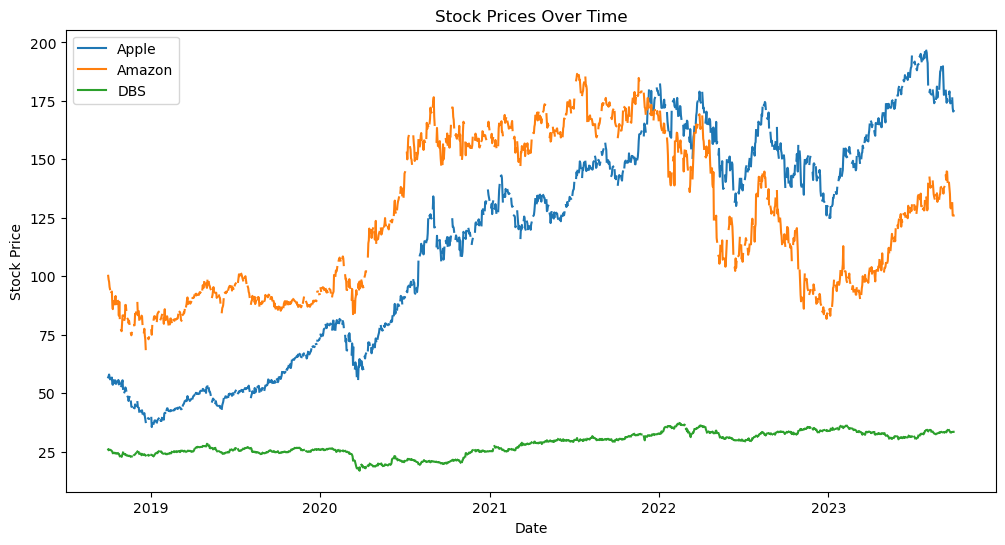

In [99]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
dates = df.index  # Assuming dates are the index of your DataFrame

plt.figure(figsize=(12, 6))

# Plotting lines for each stock
plt.plot(dates, df['Apple'], label='Apple')
plt.plot(dates, df['Amazon'], label='Amazon')
plt.plot(dates, df['DBS'], label='DBS')

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()  # Show legend with labels

plt.show()

**Observation**: As can be seen, the graph shows gaps in between due to the missing values for the dates that fall on Saturdays and Sundays

# Rolling Means

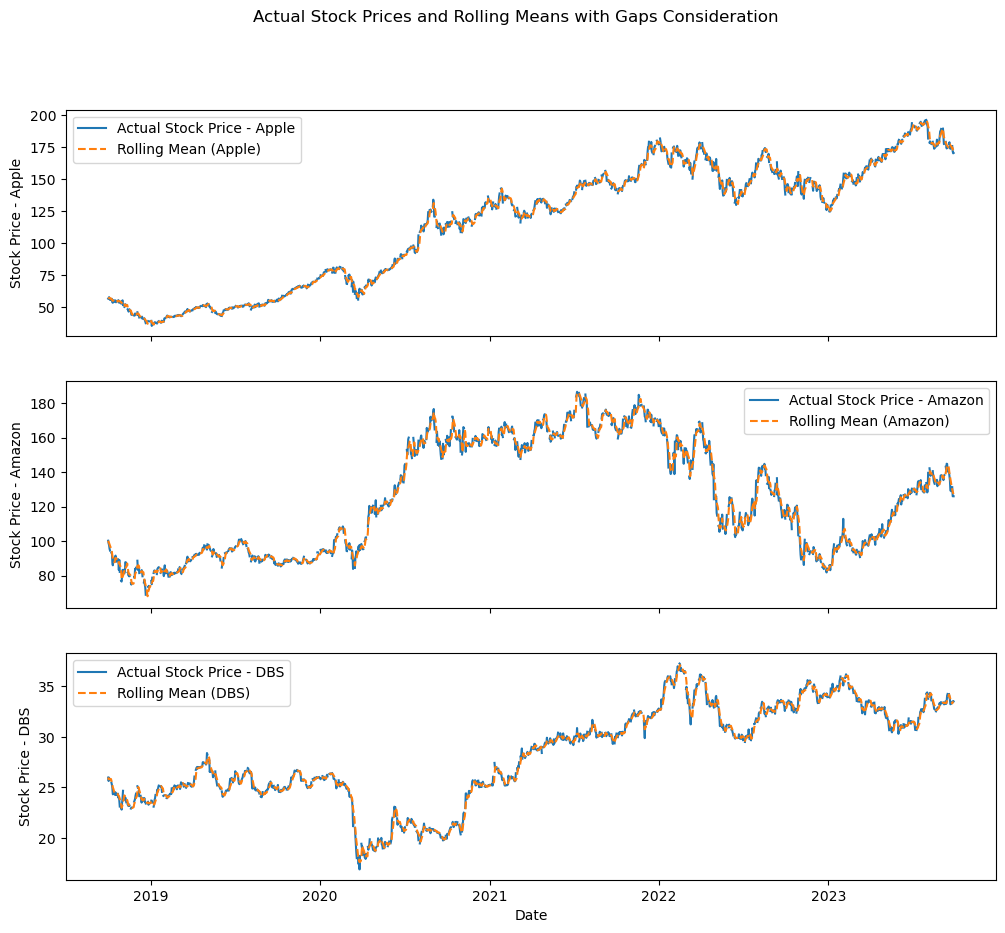

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the 5-day rolling mean for each stock with consideration for gaps
df['Rolling Mean (Apple)'] = df['Apple'].rolling(window=5, min_periods=1).mean()
df['Rolling Mean (Amazon)'] = df['Amazon'].rolling(window=5, min_periods=1).mean()
df['Rolling Mean (DBS)'] = df['DBS'].rolling(window=5, min_periods=1).mean()

# Plot actual stock prices and rolling means on the same plot
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 10), sharex=True)

# Plot for Apple
axes[0].plot(df.index, df['Apple'], label='Actual Stock Price - Apple')
axes[0].plot(df.index, df['Rolling Mean (Apple)'], label='Rolling Mean (Apple)', linestyle='--')
axes[0].set_ylabel('Stock Price - Apple')
axes[0].legend()

# Plot for Amazon
axes[1].plot(df.index, df['Amazon'], label='Actual Stock Price - Amazon')
axes[1].plot(df.index, df['Rolling Mean (Amazon)'], label='Rolling Mean (Amazon)', linestyle='--')
axes[1].set_ylabel('Stock Price - Amazon')
axes[1].legend()

# Plot for DBS
axes[2].plot(df.index, df['DBS'], label='Actual Stock Price - DBS')
axes[2].plot(df.index, df['Rolling Mean (DBS)'], label='Rolling Mean (DBS)', linestyle='--')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Stock Price - DBS')
axes[2].legend()

plt.suptitle('Actual Stock Prices and Rolling Means with Gaps Consideration')
plt.show()

**Explanation**:

**Handling Non-Trading Days**:
In the stock market, trading occurs on weekdays (Monday to Friday), and markets are closed on weekends (Saturday and Sunday).


**Rolling Mean Smoothing**:
By using a rolling mean with a window size of 5,I made the data smooth by considering the average value of the stock prices over a 5-day period, right before the stock market closes for the weekend.


**Alignment with Business Week**:
Choosing a window size of 5 aligns with the business week, emphasizing the consideration of trading days while ignoring weekends.
The rolling mean for each day is calculated based on the average of the current day and the previous four trading days.


**Enhancing Analysis**:
Smoothing the data in this way can make it easier to identify trends and patterns by removing the noise introduced by daily fluctuations.
It allows for a more stable representation of stock price movements, especially when analyzing short-term trends.

# Dataset with gaps filled in

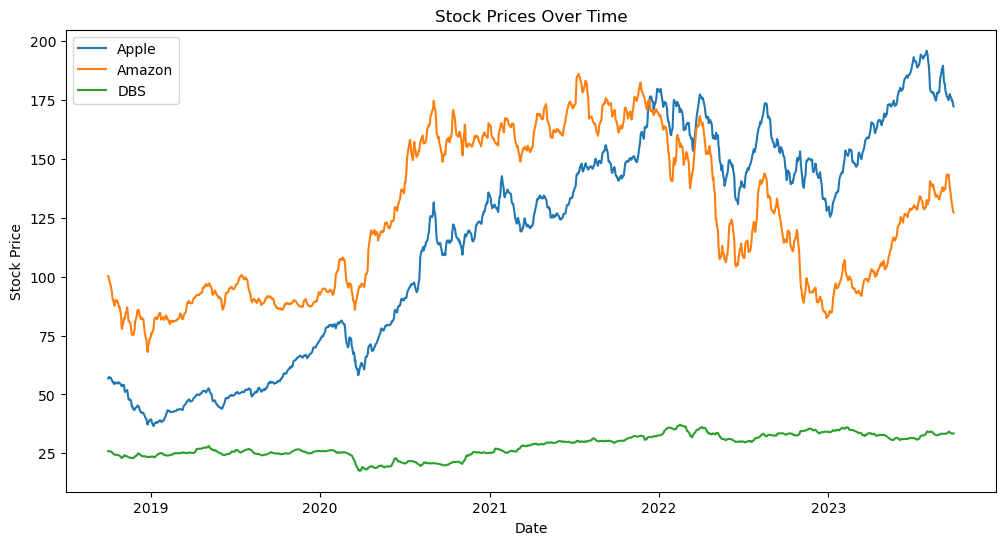

In [101]:
import matplotlib.pyplot as plt

df['Apple'] = df['Apple'].rolling(window=5, min_periods=1).mean()
df['Amazon'] = df['Amazon'].rolling(window=5, min_periods=1).mean()
df['DBS'] = df['DBS'].rolling(window=5, min_periods=1).mean()

# Assuming df is your DataFrame
dates = df.index  # Assuming dates are the index of your DataFrame

plt.figure(figsize=(12, 6))

# Plotting lines for each stock
plt.plot(dates, df['Apple'], label='Apple')
plt.plot(dates, df['Amazon'], label='Amazon')
plt.plot(dates, df['DBS'], label='DBS')

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()  # Show legend with labels

plt.show()

**Observation**: The gaps in the dataset no longer exist as the rolling mean filled in those values and made the data smooth and in this way can make it easier to identify trends and patterns and allows for a more stable representation of stock price movements

In [102]:
df.head(-10)

,Apple,Amazon,DBS,Rolling Mean (Apple),Rolling Mean (Amazon),Rolling Mean (DBS)
Date,,,,,,
2018-10-01,56.814999,100.218002,25.969999,56.814999,100.218002,25.969999
2018-10-02,57.067499,99.391750,25.799999,57.067499,99.391750,25.799999
2018-10-03,57.384167,98.807167,25.850000,57.384167,98.807167,25.850000
2018-10-04,57.287501,97.973125,25.827500,57.287501,97.973125,25.827500
2018-10-05,57.044500,97.275000,25.816000,57.044500,97.275000,25.816000
...,...,...,...,...,...,...
2023-09-14,176.402504,143.475002,33.595000,176.402504,143.475002,33.595000
2023-09-15,176.124002,142.858002,33.724001,176.124002,142.858002,33.724001
2023-09-16,175.315002,142.797500,33.782500,175.315002,142.797500,33.782500


# New Shape of Dataset after adding values

In [ ]:
df = df.drop('Rolling Mean (Apple)' , axis = 1)
df = df.drop('Rolling Mean (Amazon)' , axis = 1)
df = df.drop('Rolling Mean (DBS)' , axis = 1)

print("\nNew Shape of the DataSet")
print(df.shape)

Observation: The data had a huge increase in columns due to the added values for Saturdays and Sundays

# Apple Stock Seasonal Decomposition

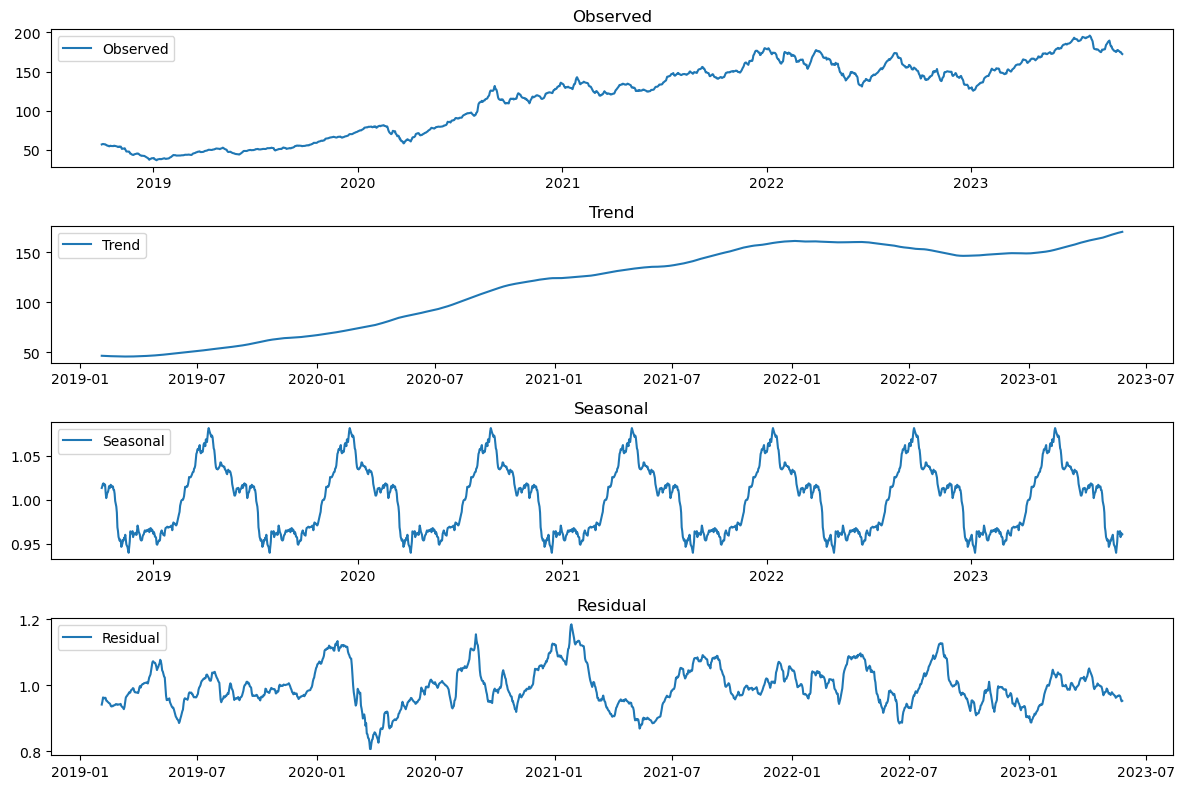

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df.index = pd.to_datetime(df.index)

result = seasonal_decompose(df['Apple'] ,model='multiplicative', period = 252)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observed')
plt.legend(loc='upper left')
plt.title('Observed')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual')

plt.tight_layout()
plt.show()

# Amazon Stock Seasonal Decomposition

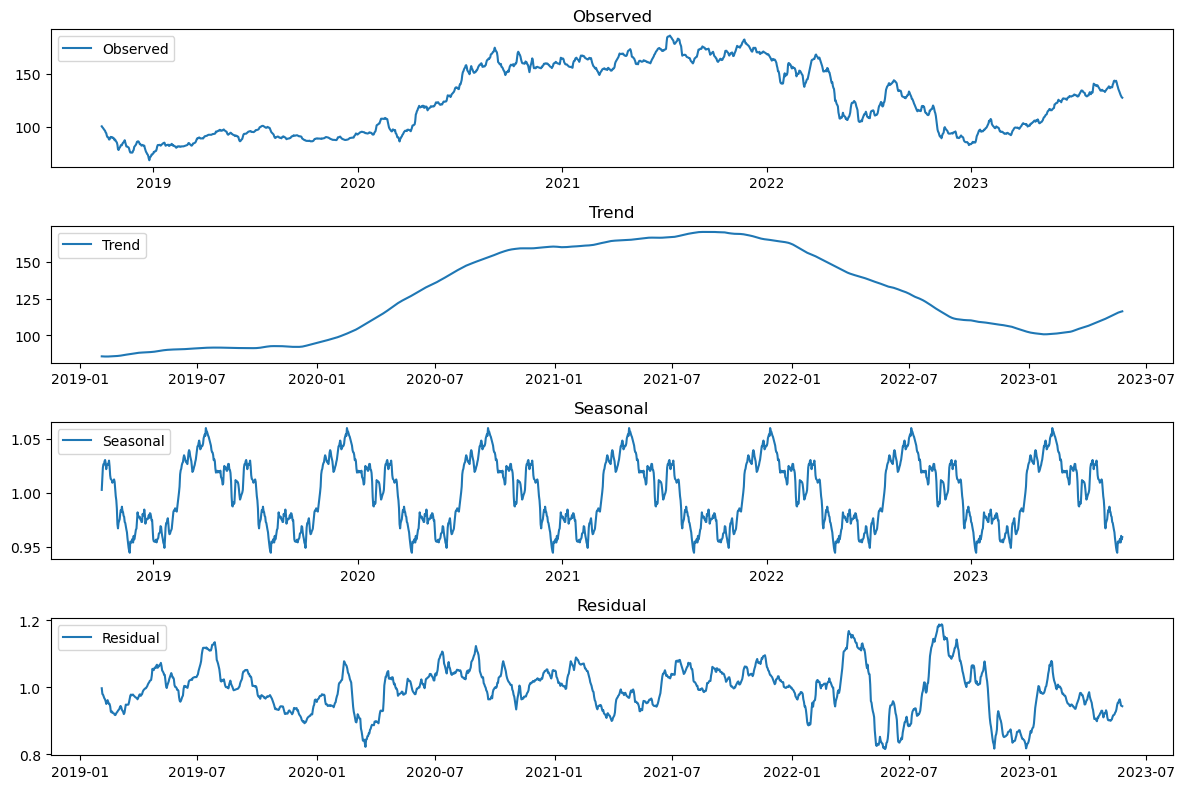

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df.index = pd.to_datetime(df.index)

result = seasonal_decompose(df['Amazon'] ,model='multiplicative', period = 252)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observed')
plt.legend(loc='upper left')
plt.title('Observed')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual')

plt.tight_layout()
plt.show()

# DBS Stock Seasonal Decomposition

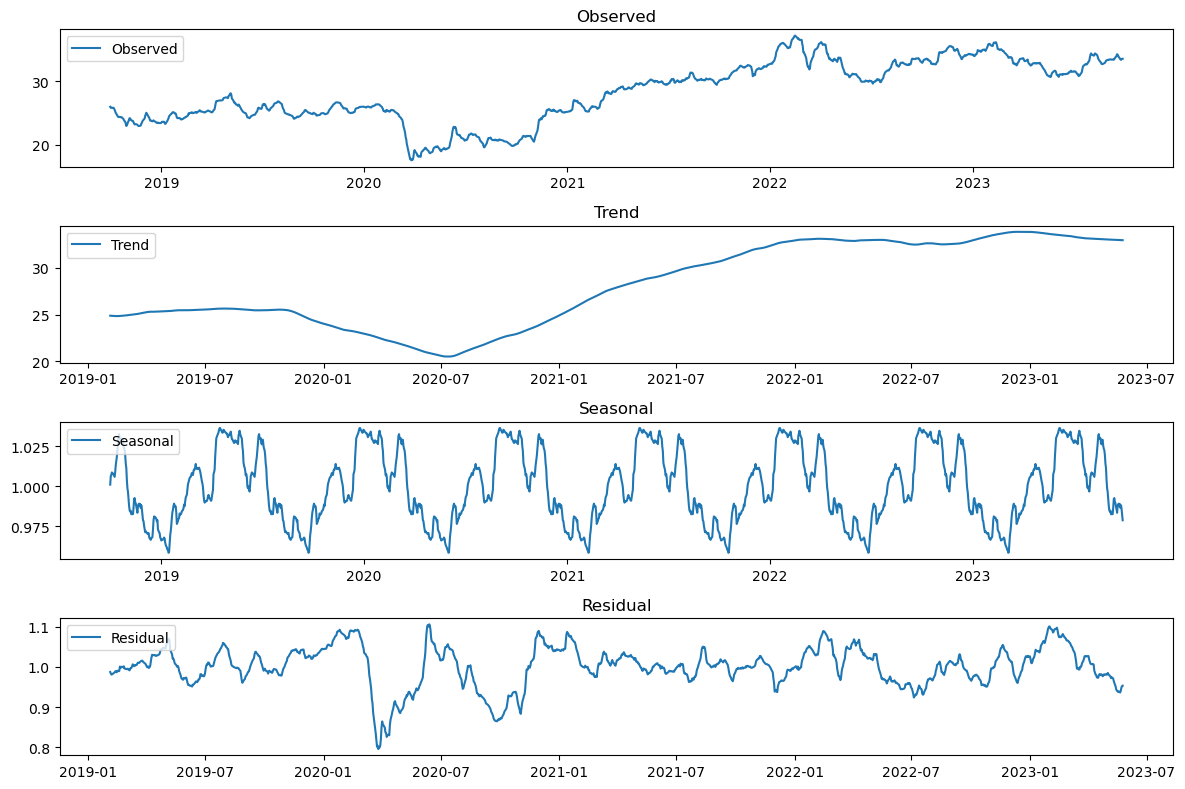

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df.index = pd.to_datetime(df.index)

result = seasonal_decompose(df['DBS'] ,model='multiplicative', period = 252)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observed')
plt.legend(loc='upper left')
plt.title('Observed')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual')

plt.tight_layout()
plt.show()

**Observation**:
Upon applying seasonal decomposition to the time series data of three stocks there were no discernible or significant seasonal components identified in the decomposed results.


**Explanation**:
Seasonal decomposition is a statistical technique used to break down a time series into its various components, including trend, seasonality, and residual (or error). The absence of specific seasonal components in the decomposition suggests that there is no repetitive and predictable pattern occurring at fixed intervals in the data.

**Several factors could contribute to the lack of observed seasonality**:

**Nature of the Stocks**:

Certain stocks, particularly those associated with industries or sectors that are not strongly influenced by seasonal factors, may exhibit less pronounced seasonality in their price movements.

**Market Dynamics**:

The overall market dynamics, economic conditions, and external factors might not exhibit distinct seasonal patterns during the observed time period.
Short Observation Period:

The time series might not cover a sufficiently long period to capture seasonal variations, especially if the stocks are relatively new or have recently undergone significant changes.

**Random Movements**:

The absence of clear seasonality could also be attributed to the presence of random movements, which might overshadow any potential seasonal patterns.

**Conclusion**:
Given the absence of specific seasonal components in the decomposition of the three stocks, it implies that the price movements of the stocks are less influenced by regular and recurring seasonal factors. 

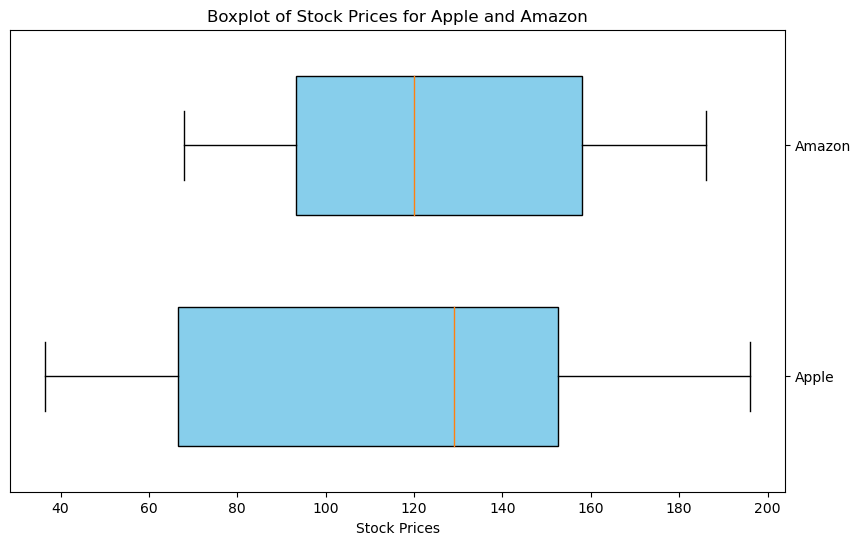

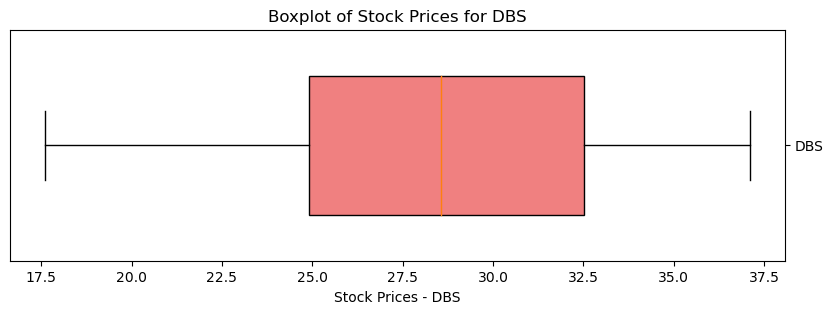

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'Apple', 'Amazon', and 'DBS'
# and dates as the index (if not, you may need to set the date as the index)

# Create a horizontal boxplot for 'Apple' and 'Amazon' combined
fig, ax1 = plt.subplots(figsize=(10, 6))

# Boxplot for Apple and Amazon combined
box1 = ax1.boxplot([df['Apple'], df['Amazon']], positions=[1, 2], widths=0.6, patch_artist=True,
                   boxprops=dict(facecolor='skyblue'), showfliers=False, vert=False)

# Set y-axis ticks and labels for 'Apple' and 'Amazon'
ax1.yaxis.tick_right()
ax1.set_yticks([1, 2])
ax1.set_yticklabels(['Apple', 'Amazon'])

# Set x-axis label for 'Apple' and 'Amazon'
ax1.set_xlabel('Stock Prices')

# Set plot title for 'Apple' and 'Amazon'
ax1.set_title('Boxplot of Stock Prices for Apple and Amazon')

# Create a separate horizontal boxplot for 'DBS'
fig, ax2 = plt.subplots(figsize=(10, 3))

# Boxplot for DBS
box2 = ax2.boxplot(df['DBS'], positions=[1], widths=0.6, patch_artist=True,
                   boxprops=dict(facecolor='lightcoral'), showfliers=False, vert=False)

# Set x-axis label for 'DBS'
ax2.set_xlabel('Stock Prices - DBS')

# Set y-axis ticks and labels for 'DBS' on the right side
ax2.yaxis.tick_right()
ax2.set_yticks([1])
ax2.set_yticklabels(['DBS'])

# Set plot title for 'DBS'
ax2.set_title('Boxplot of Stock Prices for DBS')

plt.show()

**Observation**:
Upon conducting an analysis of the time series data for three stocks, it was observed that there were no discernible outliers in the dataset.


**Conclusion**:
The absence of outliers in the time series data suggests a certain degree of stability and predictability in their price movements during the observed period. 

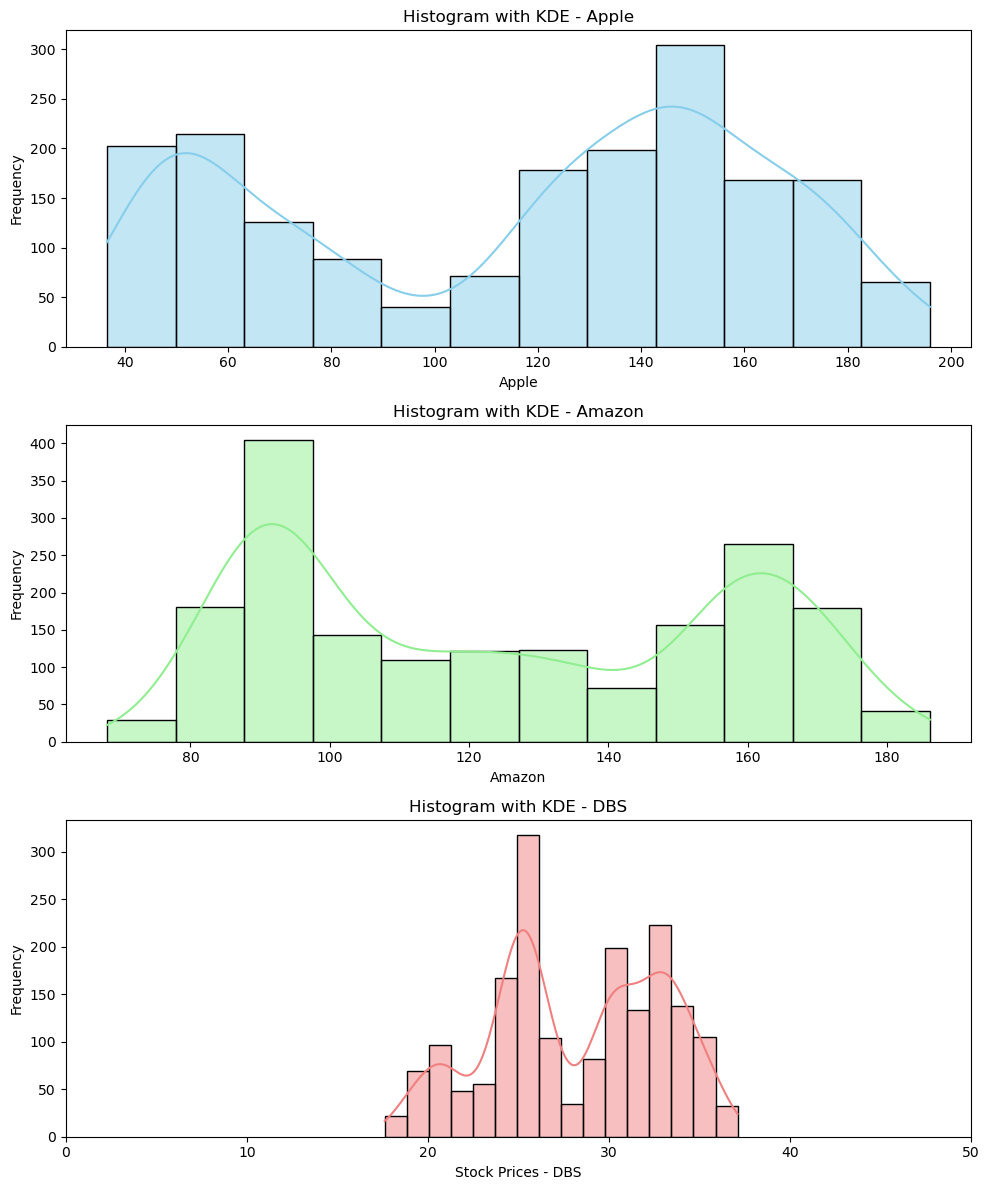

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'Apple', 'Amazon', and 'DBS'
# and dates as the index (if not, you may need to set the date as the index)

# Create separate subplots for 'Apple' and 'Amazon', and a separate subplot for 'DBS' in the same figure
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12), sharex=False)

# Histogram with KDE for 'Apple'
sns.histplot(df['Apple'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram with KDE - Apple')

# Histogram with KDE for 'Amazon'
sns.histplot(df['Amazon'], kde=True, color='lightgreen', ax=axes[1])
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram with KDE - Amazon')

# Separate subplot for 'DBS'
sns.histplot(df['DBS'], kde=True, color='lightcoral', ax=axes[2])
axes[2].set_xlabel('Stock Prices - DBS')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Histogram with KDE - DBS')
axes[2].set_xlim(0, 50)

plt.tight_layout()
plt.show()

**Observation**:
Upon visualizing the distribution of the time series data for the three stocks, through histogram plots, it is apparent that there is no distinct or characteristic shape resembling a specific probability distribution.

**Explanation**:
The histogram plots display indicate that the stock prices regularly fluctuate, going through successive periods of increase and decrease without adhering to a particular distributional form. 

**Conclusion**:
This shows the dynamic and complex nature of stock price movements. Traditional probability distributions may not accurately capture the inherent volatility observed in these stocks.

# ADF Test to determine Stationary or Non-Stationary Columns

In [152]:
print("Apple Stocks\n")

adf_result = adfuller(np.log(df['Apple']))
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")


print('\n')
print("----------------------------------------")
if (adf_result[1] > 0.05):
    print("Non-Stationary")
    print("Fail to Reject Null Hypothesis")
else:
    print("Stationary")
    print("Reject Null Hypothesis")
print("----------------------------------------")

Apple Stocks

ADF Statistic: -0.9188931492879049
p-value: 0.7816869795149666


----------------------------------------
Non-Stationary
Fail to Reject Null Hypothesis
----------------------------------------


In [153]:
print("Amazon Stocks\n")

adf_result = adfuller(np.log(df['Amazon']))
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

print('\n')
print("----------------------------------------")
if (adf_result[1] > 0.05):
    print("Non-Stationary")
    print("Fail to Reject Null Hypothesis")
else:
    print("Stationary")
    print("Reject Null Hypothesis")
print("----------------------------------------")

Amazon Stocks

ADF Statistic: -1.5985185147678294
p-value: 0.4843376321747005


----------------------------------------
Non-Stationary
Fail to Reject Null Hypothesis
----------------------------------------


In [154]:
print("DBS Stocks\n")

adf_result = adfuller(np.log(df['DBS']))
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

print('\n')
print("----------------------------------------")
if (adf_result[1] > 0.05):
    print("Non-Stationary")
    print("Fail to Reject Null Hypothesis")
else:
    print("Stationary")
    print("Reject Null Hypothesis")
print("----------------------------------------")

DBS Stocks

ADF Statistic: -1.4214751973167679
p-value: 0.5719384433488006


----------------------------------------
Non-Stationary
Fail to Reject Null Hypothesis
----------------------------------------


**Observation**:

The p-value associated with the ADF Statistic for all three stocks is > 0.05, This indicates that there is insufficient evidence to reject the null hypothesis, suggesting that the time series data for the stocks is non-stationary.

# For Apple Stocks

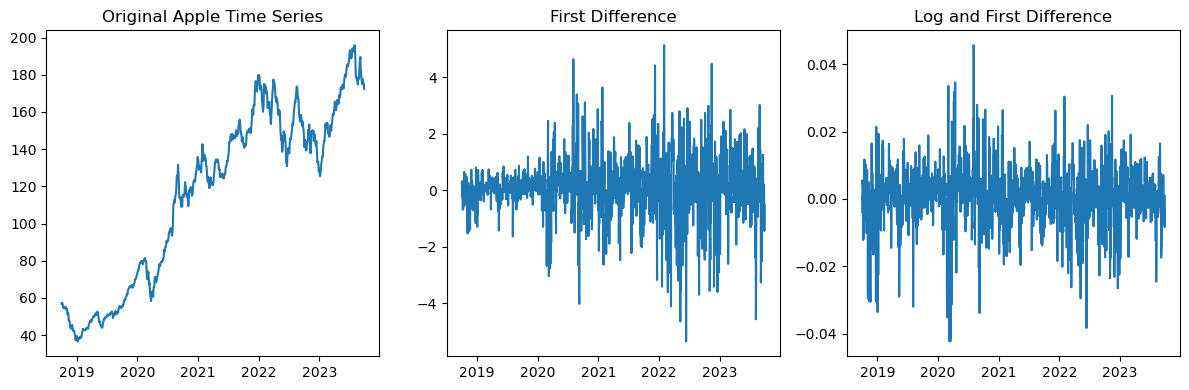

In [112]:
plt.figure(figsize = (12,4))
plt.subplot(1, 3, 1)
plt.plot(df['Apple'])
plt.title("Original Apple Time Series")

plt.subplot(1, 3, 2)
plt.plot(df['Apple'].diff())
plt.title("First Difference")

plt.subplot(1,3,3)
plt.plot(np.log(df['Apple']).diff())
plt.title("Log and First Difference")

plt.tight_layout()
plt.show()

## Adding White Noise

In [113]:
import numpy as np

# Assuming df is your DataFrame
np.random.seed(42)  # Setting a seed for reproducibility
white_noise = np.random.normal(0, 1, len(df['Apple']))  # Generating white noise

# Adding white noise to the 'Apple' column
df['Apple'] = df['Apple'] + white_noise

## Dataset with White Noise

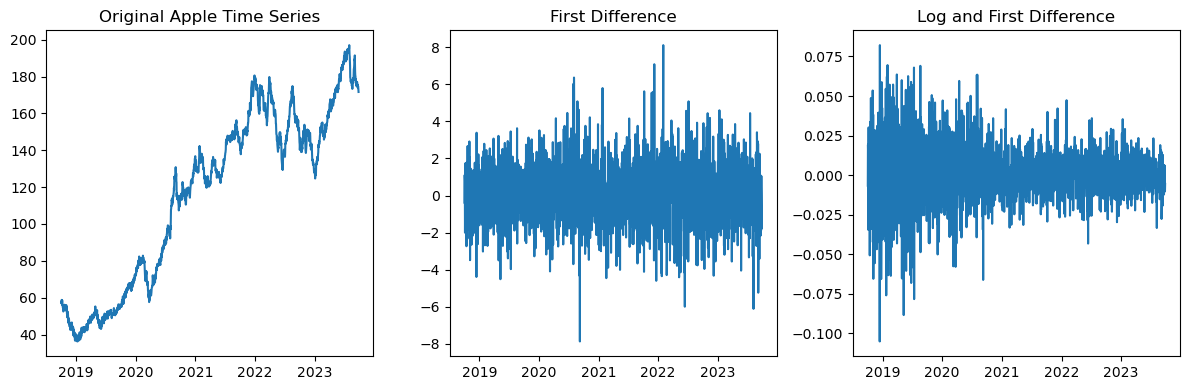

In [114]:
plt.figure(figsize = (12,4))
plt.subplot(1, 3, 1)
plt.plot(df['Apple'])
plt.title("Original Apple Time Series")

plt.subplot(1, 3, 2)
plt.plot(df['Apple'].diff())
plt.title("First Difference")

plt.subplot(1,3,3)
plt.plot(np.log(df['Apple']).diff())
plt.title("Log and First Difference")

plt.tight_layout()
plt.show()

## Ljung-Box Test for Autocorrelation

In [115]:
# Calculate the log returns and drop NaN values
y = np.log(df['Apple']).diff().dropna()

# Perform the Ljung-Box test
lb_test_result = sm.stats.acorr_ljungbox(y, lags=[20], return_df=True)
lbtest_pvalue = lb_test_result['lb_pvalue']
print(f"p-value of Ljung-Box Test: {lbtest_pvalue}")

print('\n')
print('----------------------------------------------------')
print("Reject H0; P-value < 0.05; Autocorrelations detected")
print('----------------------------------------------------')

p-value of Ljung-Box Test: 20    5.342073e-40
Name: lb_pvalue, dtype: float64


----------------------------------------------------
Reject H0; P-value < 0.05; Autocorrelations detected
----------------------------------------------------


## ACF and PACF Plot

<Figure size 600x400 with 0 Axes>

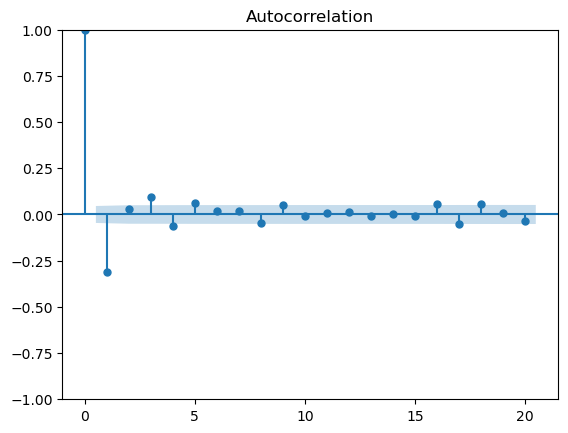

<Figure size 600x400 with 0 Axes>

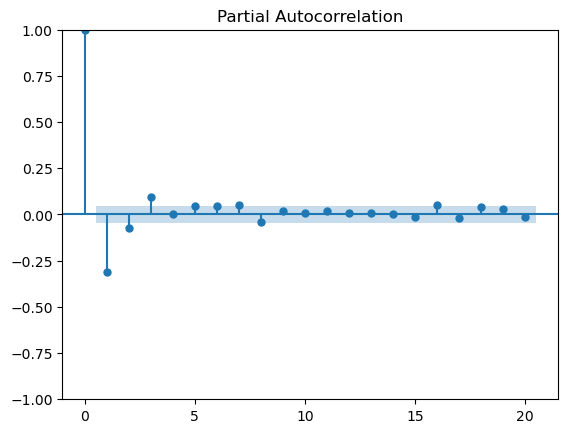

In [116]:
# Plot the ACF

plt.figure(figsize = (6,4))
plot_acf(y, lags = 20)
plt.show()

# Plot the PACF

plt.figure(figsize = (6,4))
plot_pacf(y, lags = 20)
plt.show()

# For Amazon Stock

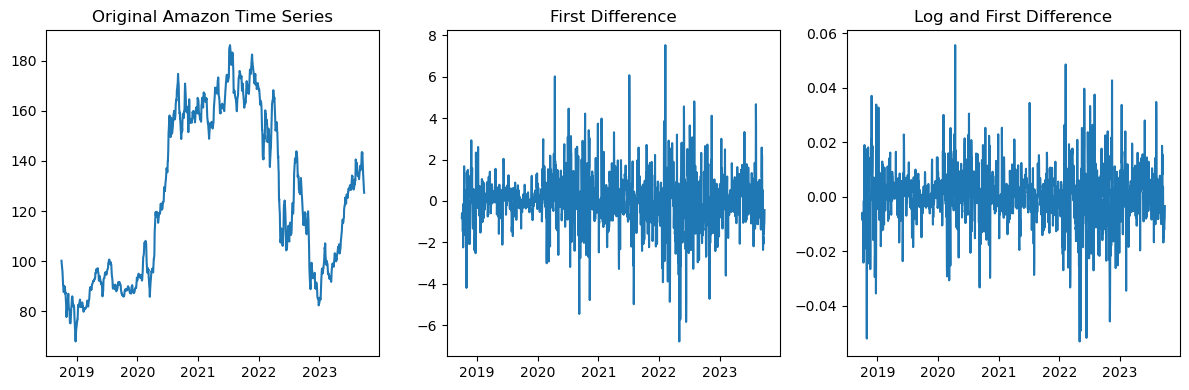

In [117]:
plt.figure(figsize = (12,4))
plt.subplot(1, 3, 1)
plt.plot(df['Amazon'])
plt.title("Original Amazon Time Series")

plt.subplot(1, 3, 2)
plt.plot(df['Amazon'].diff())
plt.title("First Difference")

plt.subplot(1,3,3)
plt.plot(np.log(df['Amazon']).diff())
plt.title("Log and First Difference")

plt.tight_layout()
plt.show()

In [118]:
import numpy as np

# Assuming df is your DataFrame
np.random.seed(42)  # Setting a seed for reproducibility
white_noise = np.random.normal(0, 1, len(df['Amazon']))  # Generating white noise

# Adding white noise to the 'Apple' column
df['Amazon'] = df['Amazon'] + white_noise

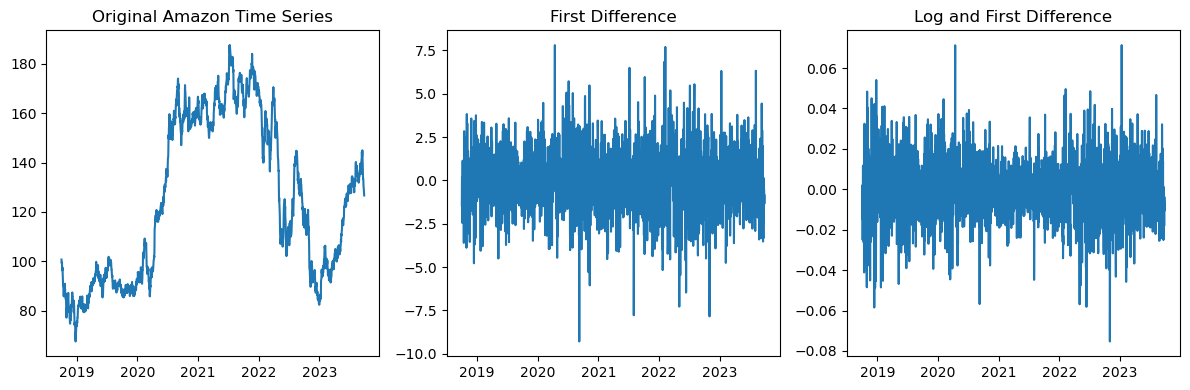

In [119]:
plt.figure(figsize = (12,4))
plt.subplot(1, 3, 1)
plt.plot(df['Amazon'])
plt.title("Original Amazon Time Series")

plt.subplot(1, 3, 2)
plt.plot(df['Amazon'].diff())
plt.title("First Difference")

plt.subplot(1,3,3)
plt.plot(np.log(df['Amazon']).diff())
plt.title("Log and First Difference")

plt.tight_layout()
plt.show()

## Ljung-Box Test for Autocorrelation

In [120]:
# Calculate the log returns and drop NaN values
y = np.log(df['Amazon']).diff().dropna()

# Perform the Ljung-Box test
lb_test_result = sm.stats.acorr_ljungbox(y, lags=[20], return_df=True)
lbtest_pvalue = lb_test_result['lb_pvalue']
print(f"p-value of Ljung-Box Test: {lbtest_pvalue}")

print('\n')
print('----------------------------------------------------')
print("Reject H0; P-value < 0.05; Autocorrelations detected")
print('----------------------------------------------------')

p-value of Ljung-Box Test: 20    3.312849e-08
Name: lb_pvalue, dtype: float64


----------------------------------------------------
Reject H0; P-value < 0.05; Autocorrelations detected
----------------------------------------------------


## ACF and PACF Plot

<Figure size 600x400 with 0 Axes>

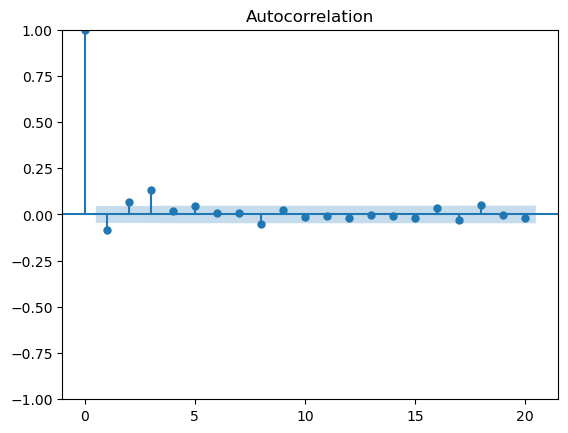

<Figure size 600x400 with 0 Axes>

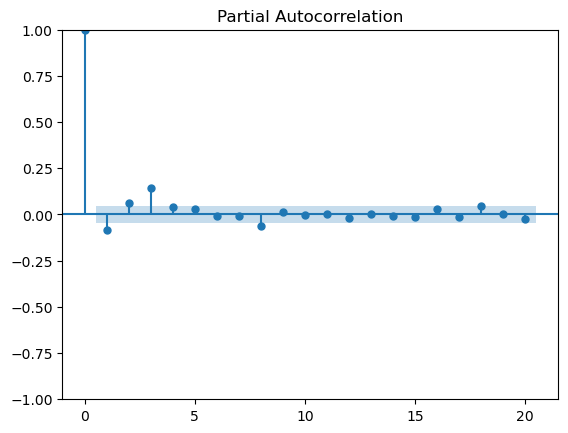

In [121]:
# Plot the ACF

plt.figure(figsize = (6,4))
plot_acf(y, lags = 20)
plt.show()

# Plot the PACF

plt.figure(figsize = (6,4))
plot_pacf(y, lags = 20)
plt.show()

# For DBS Stock

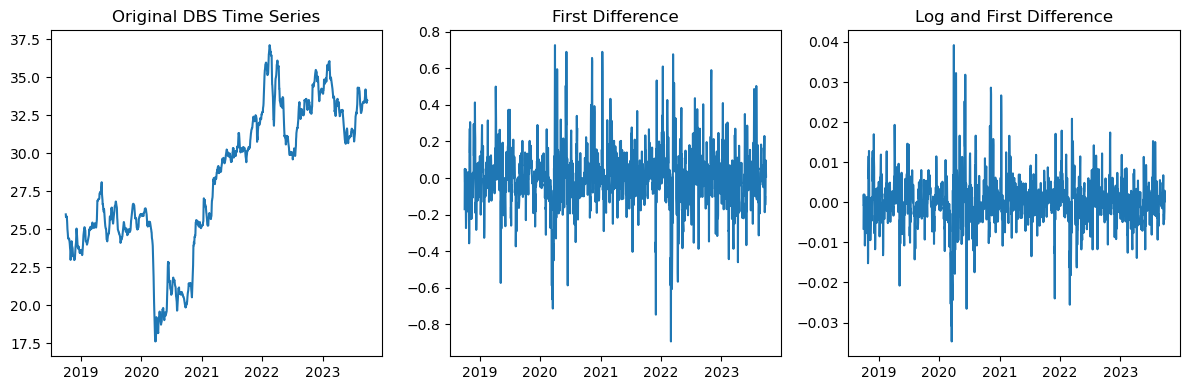

In [122]:
plt.figure(figsize = (12,4))
plt.subplot(1, 3, 1)
plt.plot(df['DBS'])
plt.title("Original DBS Time Series")

plt.subplot(1, 3, 2)
plt.plot(df['DBS'].diff())
plt.title("First Difference")

plt.subplot(1,3,3)
plt.plot(np.log(df['DBS']).diff())
plt.title("Log and First Difference")

plt.tight_layout()
plt.show()

In [123]:
import numpy as np

# Assuming df is your DataFrame
np.random.seed(42)  # Setting a seed for reproducibility
white_noise = np.random.normal(0, 1, len(df['DBS']))  # Generating white noise

# Adding white noise to the 'Apple' column
df['DBS'] = df['DBS'] + white_noise

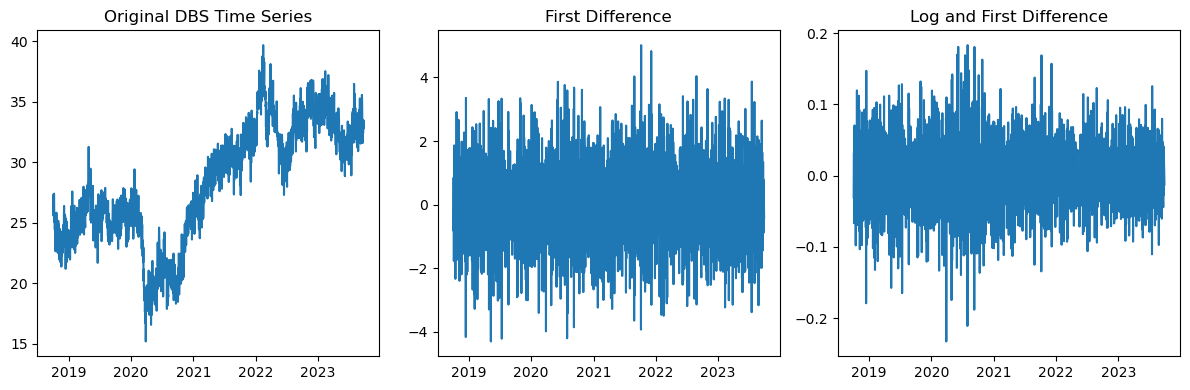

In [124]:
plt.figure(figsize = (12,4))
plt.subplot(1, 3, 1)
plt.plot(df['DBS'])
plt.title("Original DBS Time Series")

plt.subplot(1, 3, 2)
plt.plot(df['DBS'].diff())
plt.title("First Difference")

plt.subplot(1,3,3)
plt.plot(np.log(df['DBS']).diff())
plt.title("Log and First Difference")

plt.tight_layout()
plt.show()

## Ljung-Box Test for Autocorrelation

In [125]:
# Calculate the log returns and drop NaN values
y = np.log(df['DBS']).diff().dropna()

# Perform the Ljung-Box test
lb_test_result = sm.stats.acorr_ljungbox(y, lags=[20], return_df=True)
lbtest_pvalue = lb_test_result['lb_pvalue']
print(f"p-value of Ljung-Box Test: {lbtest_pvalue}")

print('\n')
print('----------------------------------------------------')
print("Reject H0; P-value < 0.05; Autocorrelations detected")
print('----------------------------------------------------')

p-value of Ljung-Box Test: 20    1.765225e-90
Name: lb_pvalue, dtype: float64


----------------------------------------------------
Reject H0; P-value < 0.05; Autocorrelations detected
----------------------------------------------------


## ACF and PACF Plot

<Figure size 600x400 with 0 Axes>

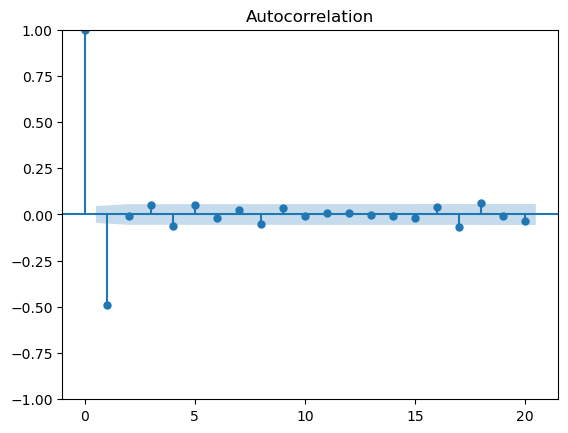

<Figure size 600x400 with 0 Axes>

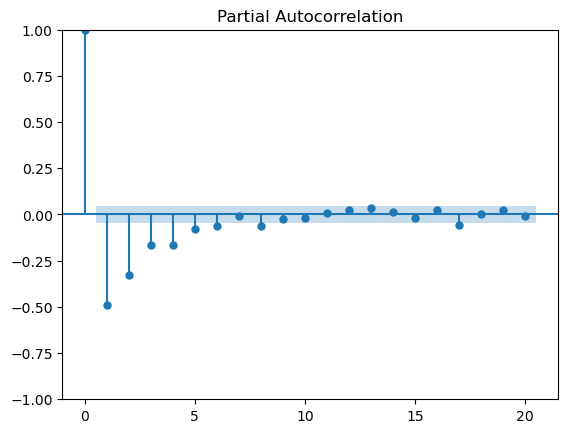

In [126]:
# Plot the ACF

plt.figure(figsize = (6,4))
plot_acf(y, lags = 20)
plt.show()

# Plot the PACF

plt.figure(figsize = (6,4))
plot_pacf(y, lags = 20)
plt.show()

# ARIMA and SARIMAX Models

In [127]:
split_percentage = 0.8
split_index = int(len(df) * split_percentage)

train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]


train_data

,Apple,Amazon,DBS
Date,,,
2018-10-01,57.311713,100.714716,26.466713
2018-10-02,56.929235,99.253486,25.661735
2018-10-03,58.031856,99.454855,26.497688
2018-10-04,58.810530,99.496155,27.350530
2018-10-05,56.810347,97.040846,25.581846
...,...,...,...
2022-09-24,154.013008,118.520510,34.093010
2022-09-25,150.535904,114.782570,31.809237
2022-09-26,152.066676,116.166675,34.236675


# Training For Apple Stocks

## Using AUTO ARIMA to Compare Results

In [128]:
model = pm.auto_arima(np.log(train_data['Apple']), seasonal = True, m = 12, trace = True,
                     error_action = "ignore", suppress_warning = True,
                     stepwise = False, approximation = False)
print(model.summary())

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-7165.024, Time=0.40 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-7163.150, Time=0.46 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=-7161.147, Time=3.44 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-7163.149, Time=0.61 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-7161.150, Time=1.36 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=-7159.151, Time=6.08 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=-7161.139, Time=1.45 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=-7159.142, Time=3.55 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=-7157.431, Time=6.93 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-7335.095, Time=0.99 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-7333.385, Time=2.88 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=-7331.954, Time=10.66 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-7333.398, Time=2.22 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-7331.406, Time=4.52 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=-732

In [129]:
best_model = ARIMA(np.log(train_data['Apple']), order = model.order, seasonal_order = model.seasonal_order)
best_model_fit = best_model.fit()
print(best_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Apple   No. Observations:                 1459
Model:                 ARIMA(0, 1, 5)   Log Likelihood                3686.359
Date:                Fri, 09 Feb 2024   AIC                          -7360.718
Time:                        18:14:10   BIC                          -7329.009
Sample:                    10-01-2018   HQIC                         -7348.888
                         - 09-28-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3620      0.021    -17.530      0.000      -0.402      -0.321
ma.L2          0.0656      0.023      2.837      0.005       0.020       0.111
ma.L3          0.0823      0.023      3.612      0.0

## ARIMA Plot

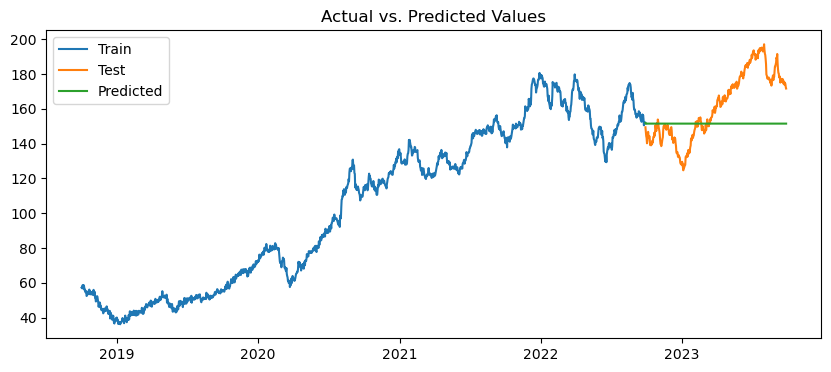

In [130]:
# Make predictions on the test data
predictions = np.exp(best_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1))

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 4))
plt.plot(train_data.index, train_data['Apple'], label='Train')
plt.plot(test_data.index, test_data['Apple'], label="Test")
plt.plot(predictions.index, predictions, label="Predicted")
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.show()

## Manual SARIMAX Model

In [131]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

order = (2, 1, 2)  # Replace with your determined values for p, d, q
seasonal_order = (1, 1, 1, 7)  # Replace with your determined values for P, D, Q, s

model = SARIMAX(train_data['Apple'], order=order, seasonal_order=seasonal_order)
results = model.fit()

C:\Users\jsoor\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


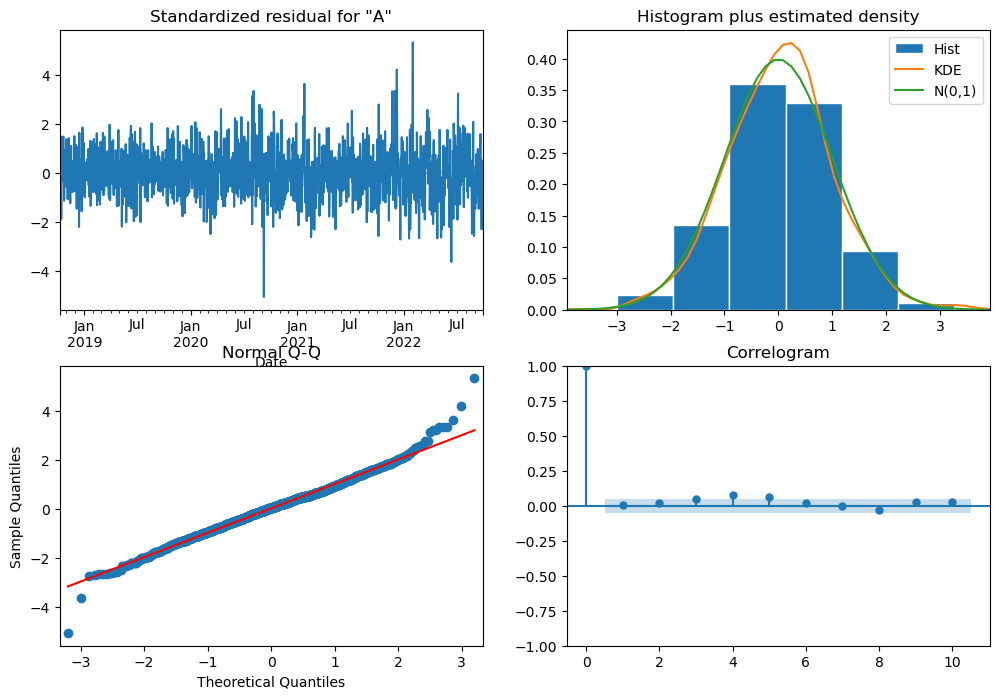

In [132]:
results.plot_diagnostics(figsize=(12, 8))
plt.show()

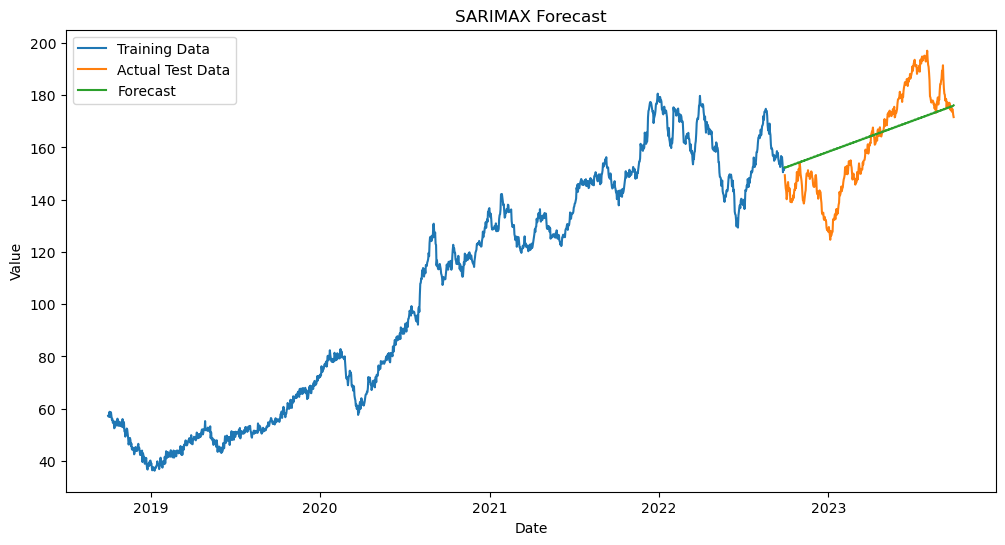

In [133]:
# Specify the number of steps to forecast
forecast_steps = len(test_data)

# Make forecasts on the test data
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(test_data.index[0], periods=forecast_steps, freq=test_data.index.freq)
forecast_df = pd.DataFrame({'Forecast': forecast.predicted_mean.values}, index=forecast_index)

# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train_data['Apple'], label='Training Data')
plt.plot(test_data['Apple'], label='Actual Test Data')
plt.plot(forecast_df['Forecast'], label='Forecast')
plt.title('SARIMAX Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Training For Amazon Stocks

# Auto ARIMA Model to Compare

In [155]:
model = pm.auto_arima(np.log(train_data['Amazon']), seasonal = True, m = 12, trace = True,
                     error_action = "ignore", suppress_warning = True,
                     stepwise = False, approximation = False)
print(model.summary())

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-7927.680, Time=0.11 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-7926.100, Time=0.42 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=-7923.411, Time=0.88 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-7926.113, Time=0.30 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-7924.136, Time=0.94 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=-7922.096, Time=3.54 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=-7924.188, Time=0.86 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=-7922.164, Time=2.57 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=-7920.016, Time=4.48 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-7936.401, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-7934.805, Time=0.54 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=-7933.457, Time=2.67 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-7934.815, Time=0.52 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-7932.830, Time=0.67 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=-7931

In [156]:
best_model = ARIMA(np.log(train_data['Amazon']), order = model.order, seasonal_order = model.seasonal_order)
best_model_fit = best_model.fit()
print(best_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Apple   No. Observations:                 1459
Model:                 ARIMA(3, 1, 0)   Log Likelihood                3680.231
Date:                Fri, 09 Feb 2024   AIC                          -7352.461
Time:                        22:28:59   BIC                          -7331.322
Sample:                    10-01-2018   HQIC                         -7344.575
                         - 09-28-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3549      0.020    -17.315      0.000      -0.395      -0.315
ar.L2         -0.0578      0.023     -2.490      0.013      -0.103      -0.012
ar.L3          0.0855      0.021      4.057      0.0

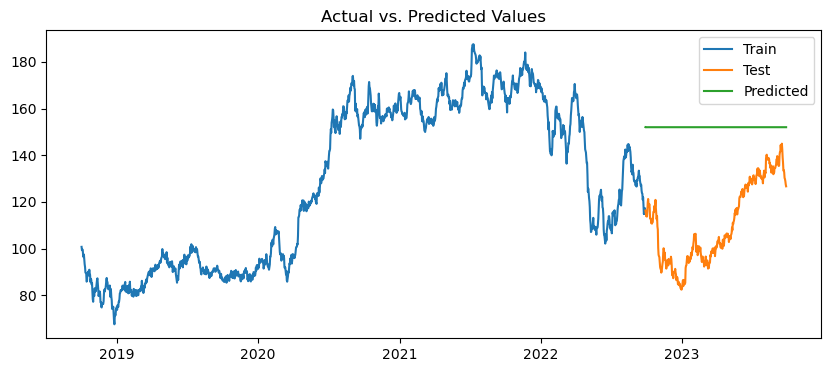

In [157]:
# Make predictions on the test data
predictions = np.exp(best_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1))

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 4))
plt.plot(train_data.index, train_data['Amazon'], label='Train')
plt.plot(test_data.index, test_data['Amazon'], label="Test")
plt.plot(predictions.index, predictions, label="Predicted")
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.show()

## Manual SARIMAX Model

In [134]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

order = (2, 1, 2)  # Replace with your determined values for p, d, q
seasonal_order = (1, 1, 1, 7)  # Replace with your determined values for P, D, Q, s

model = SARIMAX(train_data['Amazon'], order=order, seasonal_order=seasonal_order)
results = model.fit()

C:\Users\jsoor\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


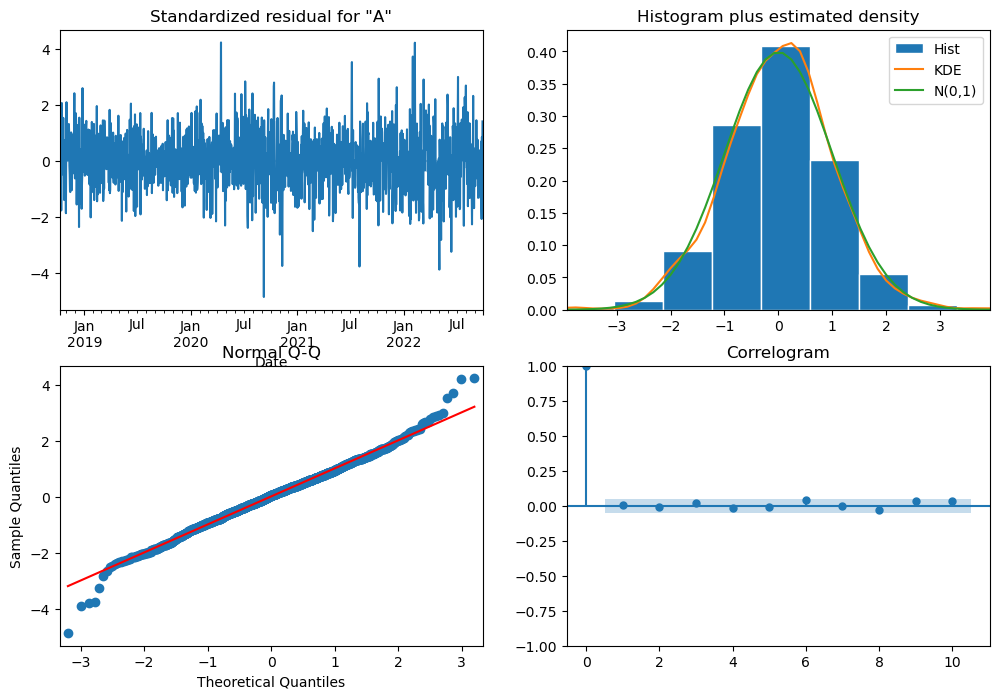

In [135]:
results.plot_diagnostics(figsize=(12, 8))
plt.show()

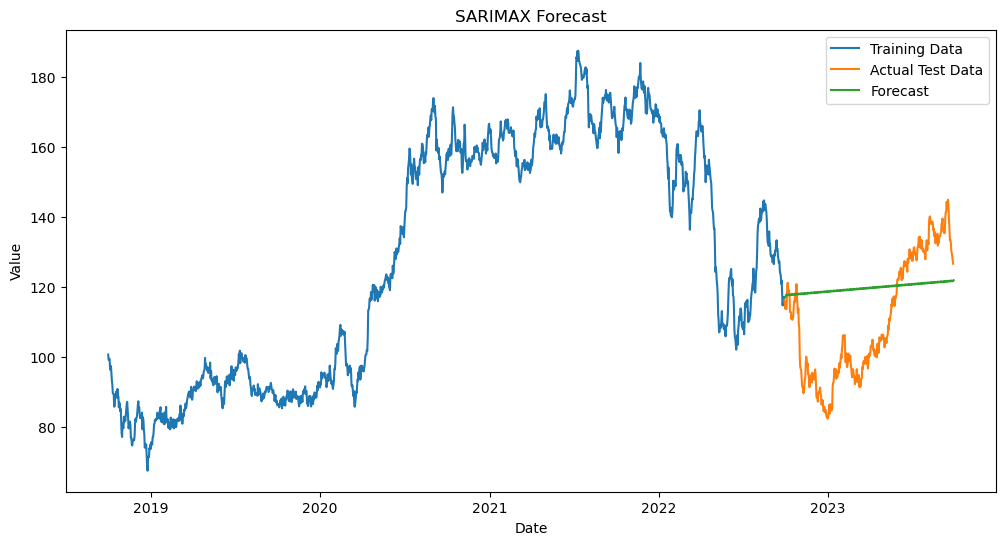

In [136]:
# Specify the number of steps to forecast
forecast_steps = len(test_data)

# Make forecasts on the test data
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(test_data.index[0], periods=forecast_steps, freq=test_data.index.freq)
forecast_df = pd.DataFrame({'Forecast': forecast.predicted_mean.values}, index=forecast_index)

# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train_data['Amazon'], label='Training Data')
plt.plot(test_data['Amazon'], label='Actual Test Data')
plt.plot(forecast_df['Forecast'], label='Forecast')
plt.title('SARIMAX Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Training For DBS Stocks

# Auto ARIMA Model For Comparison

In [158]:
model = pm.auto_arima(np.log(train_data['DBS']), seasonal = True, m = 12, trace = True,
                     error_action = "ignore", suppress_warning = True,
                     stepwise = False, approximation = False)
print(model.summary())

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-4313.179, Time=0.18 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-4311.177, Time=0.23 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=-4309.183, Time=1.66 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-4311.179, Time=0.48 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-4309.177, Time=0.29 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=-4307.184, Time=2.62 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=-4309.183, Time=0.76 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=-4307.182, Time=0.91 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=-4305.182, Time=1.80 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-4970.730, Time=0.35 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-4969.020, Time=1.34 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=-4967.714, Time=5.43 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-4969.007, Time=1.50 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-4967.010, Time=2.85 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=-4965

In [159]:
best_model = ARIMA(np.log(train_data['DBS']), order = model.order, seasonal_order = model.seasonal_order)
best_model_fit = best_model.fit()
print(best_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    DBS   No. Observations:                 1459
Model:                 ARIMA(1, 1, 3)   Log Likelihood                2491.979
Date:                Fri, 09 Feb 2024   AIC                          -4973.958
Time:                        22:33:46   BIC                          -4947.533
Sample:                    10-01-2018   HQIC                         -4964.100
                         - 09-28-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8554      0.153     -5.594      0.000      -1.155      -0.556
ma.L1          0.1006      0.153      0.658      0.511      -0.199       0.400
ma.L2         -0.6126      0.109     -5.624      0.0

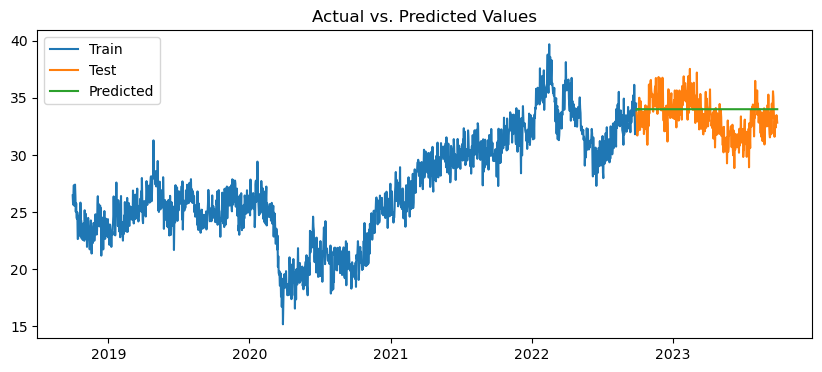

In [160]:
# Make predictions on the test data
predictions = np.exp(best_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1))

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 4))
plt.plot(train_data.index, train_data['DBS'], label='Train')
plt.plot(test_data.index, test_data['DBS'], label="Test")
plt.plot(predictions.index, predictions, label="Predicted")
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.show()

## Manual SARIMAX Model

In [139]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

order = (2, 1, 2)  # Replace with your determined values for p, d, q
seasonal_order = (1, 1, 1, 7)  # Replace with your determined values for P, D, Q, s

model = SARIMAX(train_data['DBS'], order=order, seasonal_order=seasonal_order)
results = model.fit()

C:\Users\jsoor\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jsoor\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


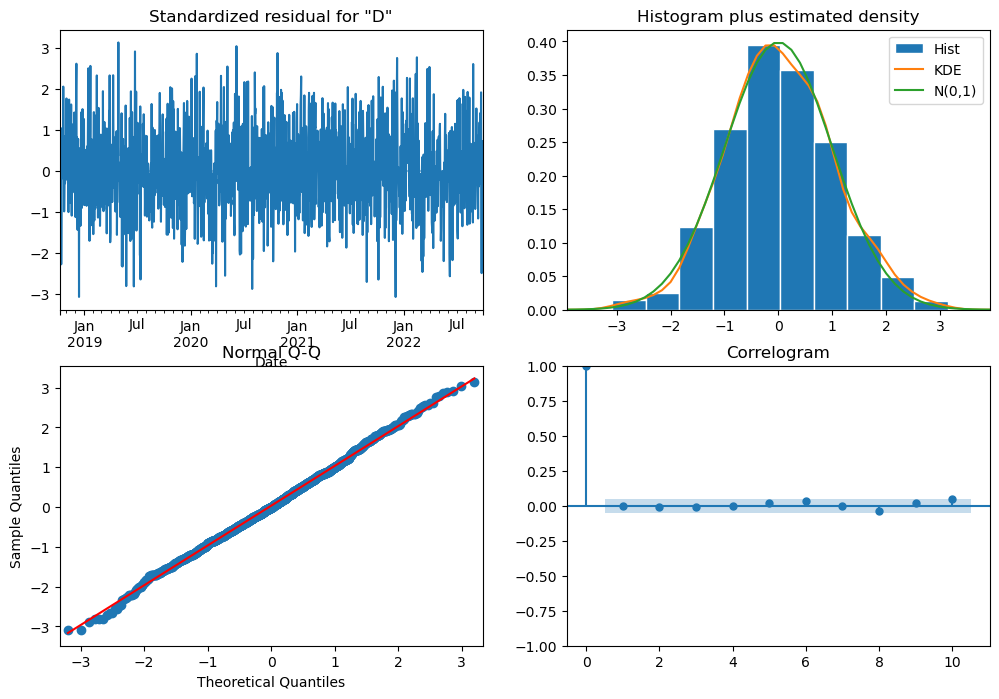

In [140]:
results.plot_diagnostics(figsize=(12, 8))
plt.show()

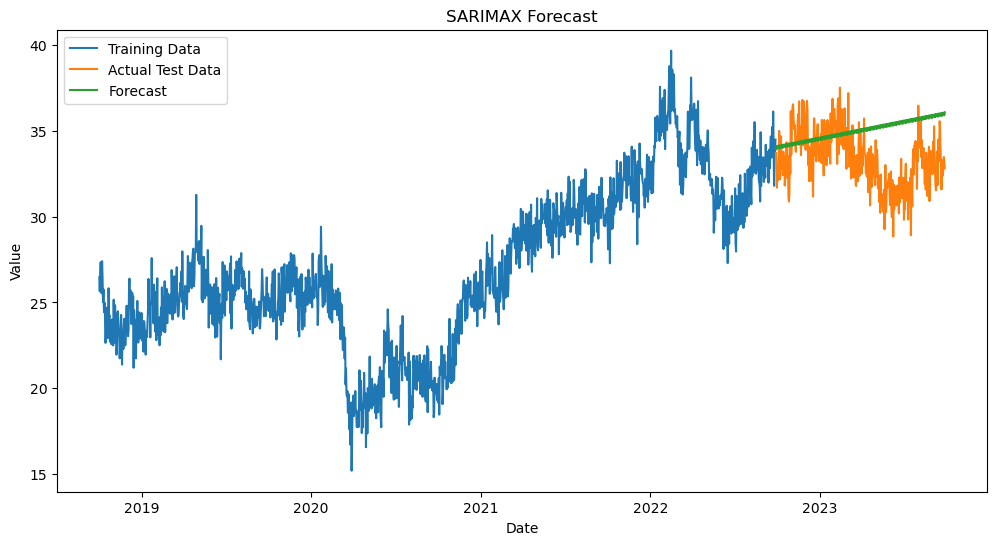

In [141]:
# Specify the number of steps to forecast
forecast_steps = len(test_data)

# Make forecasts on the test data
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(test_data.index[0], periods=forecast_steps, freq=test_data.index.freq)
forecast_df = pd.DataFrame({'Forecast': forecast.predicted_mean.values}, index=forecast_index)

# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train_data['DBS'], label='Training Data')
plt.plot(test_data['DBS'], label='Actual Test Data')
plt.plot(forecast_df['Forecast'], label='Forecast')
plt.title('SARIMAX Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Final Analysis and Conclusion

Finally,  I can say that after analysing the data, the predictive models show that all 3 stocks will have a gradual increase in their share prices. Moreover, this dataset is one that shows no pattern in any way, making it an accurate dataset for stock prices.
